Saving processed data to CSV files...
✅ Comprehension data saved to: comprehension_data.csv

Creating summary statistics CSV...

Creating detailed change analysis CSV...

📊 All data files saved successfully!
   - Total files created: 6
   - Location: Current working directory
=== DEBUGGING VOCABULARY EXPRESSION DATA ===
Original dataframe shape: (10, 15)
Total participants: 10

All participant IDs: [1, 2, 3, 8, 9, 10, 11, 12, 15, 24]

=== VOCABULARY EXPRESSION RAW DATA ===
Checking PRE_VOCAB_ESPR and POST_VOCAB_ESPR columns:
   ID PRE_VOCAB_ESPR POST_VOCAB_ESPR  PRE_VOCAB_ESPR_prop  \
0   1          63/67           63/67             0.940299   
1   2          57/67           59/67             0.850746   
2   3          61/67           61/67             0.910448   
3   8          57/67           62/67             0.850746   
4   9          61/67           63/67             0.910448   
5  10          61/67           61/67             0.910448   
6  11          56/67           56/67      

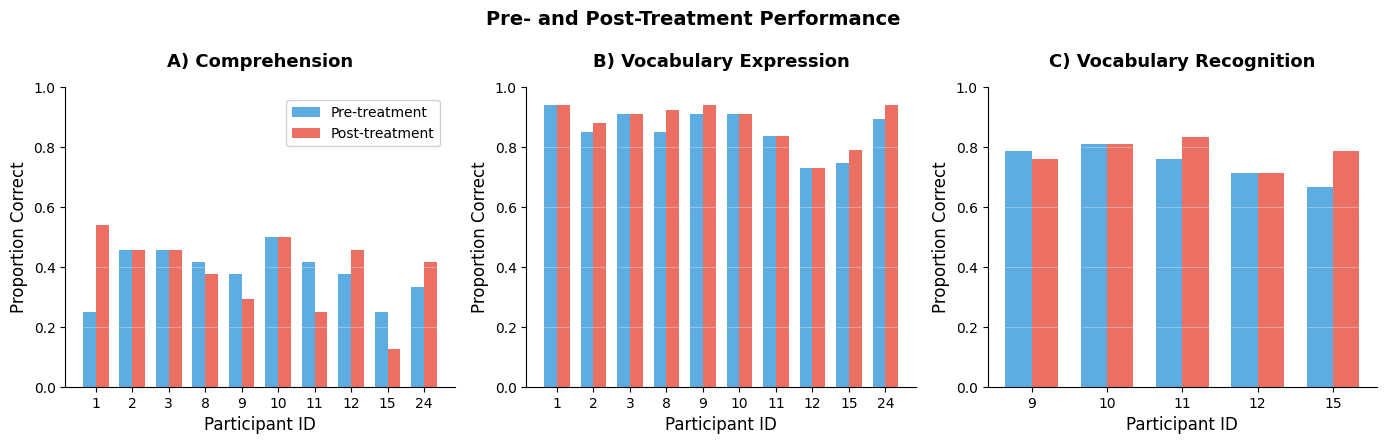

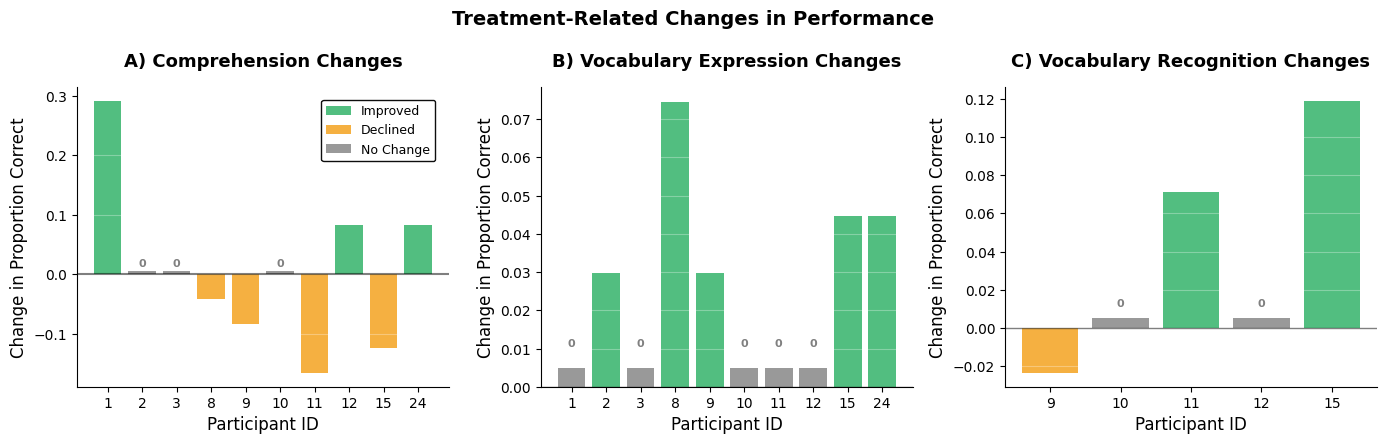

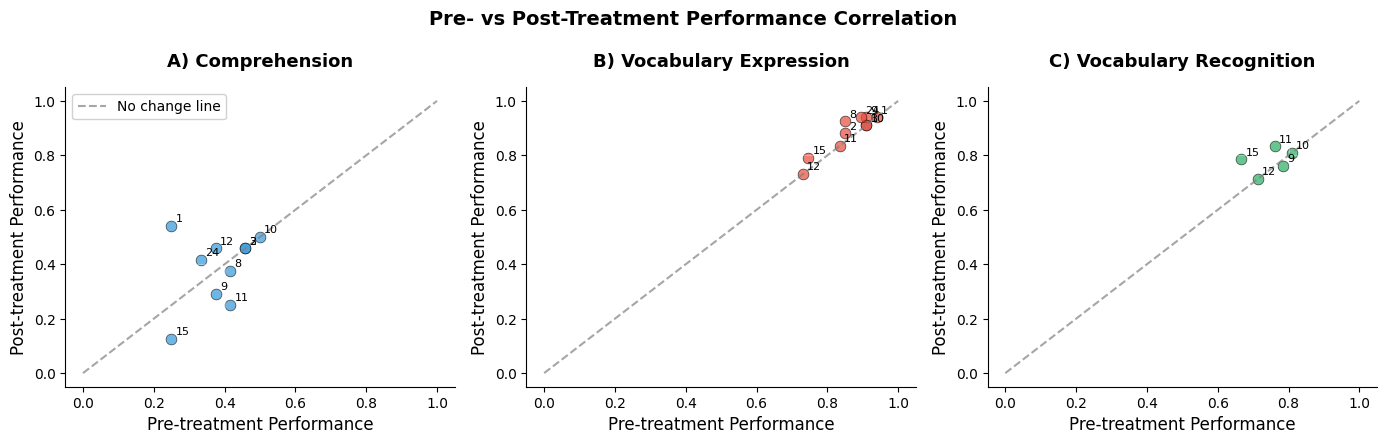


SUMMARY STATISTICS

Comprehension:
  Pre:  Mean = 0.383 (Range: 0.250 - 0.500)
  Post: Mean = 0.387 (Range: 0.125 - 0.542)
  Change: Mean = 0.004 (Range: -0.167 - 0.292)
  Results: 3 improved, 4 declined, 3 no change

Vocabulary Expression:
  Pre:  Mean = 0.858 (Range: 0.731 - 0.940)
  Post: Mean = 0.881 (Range: 0.731 - 0.940)
  Change: Mean = 0.022 (Range: 0.000 - 0.075)
  Results: 5 improved, 0 declined, 5 no change

Vocabulary Recognition:
  Pre:  Mean = 0.748 (Range: 0.667 - 0.810)
  Post: Mean = 0.781 (Range: 0.714 - 0.833)
  Change: Mean = 0.033 (Range: -0.024 - 0.119)
  Results: 2 improved, 1 declined, 2 no change

DETAILED PARTICIPANT ANALYSIS

COMPREHENSION CHANGES:
--------------------------------------------------
ID  1: 6/24   → 13/24  (0.25 → 0.54) Change: +0.29 ↑ IMPROVED
ID  2: 11/24  → 11/24  (0.46 → 0.46) Change: +0.00 → NO CHANGE
ID  3: 11/24  → 11/24  (0.46 → 0.46) Change: +0.00 → NO CHANGE
ID  8: 10/24  → 9/24   (0.42 → 0.38) Change: -0.04 ↓ DECLINED
ID  9: 9/24   

In [9]:
# Create clean, professional plots for PhD thesis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set clean, professional style with white background and black text
plt.rcParams.update({
    'font.size': 11,
    'font.family': 'DejaVu Sans',
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 14,
    'axes.linewidth': 0.8,
    'grid.alpha': 0.3,
    'axes.spines.top': False,
    'axes.spines.right': False,
    # White background settings
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'savefig.edgecolor': 'none',
    # Black text settings
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.edgecolor': 'black',
    'axes.spines.left': True,
    'axes.spines.bottom': True
})

# Read and process data (keeping your existing preprocessing)
df = pd.read_csv('/Users/Martina.Galletti/Downloads/dati-artis1/pre-post/sample-users.xlsx - sub-samples-results.csv')

def extract_proportional_score(score_str):
    if pd.isna(score_str) or score_str == '':
        return np.nan
    if '/' in str(score_str):
        numerator, denominator = str(score_str).split('/')
        return float(numerator) / float(denominator)
    return float(score_str)

df['COMPR_PRE_prop'] = df['COMPR_PRE'].apply(extract_proportional_score)
df['COMPR_POST_prop'] = df['COMPR_POST'].apply(extract_proportional_score)
df['PRE_VOCAB_ESPR_prop'] = df['PRE_VOCAB_ESPR'].apply(extract_proportional_score)
df['POST_VOCAB_ESPR_prop'] = df['POST_VOCAB_ESPR'].apply(extract_proportional_score)
df['PRE_VOCAB_REC_prop'] = df['PRE_VOCAB_REC'].apply(extract_proportional_score)
df['POST_VOCAB_REC_prop'] = df['POST_VOCAB_REC'].apply(extract_proportional_score)

compr_data = df.dropna(subset=['COMPR_PRE_prop', 'COMPR_POST_prop']).reset_index(drop=True)
vocab_expr_data = df.dropna(subset=['PRE_VOCAB_ESPR_prop', 'POST_VOCAB_ESPR_prop']).reset_index(drop=True)
vocab_rec_data = df.dropna(subset=['PRE_VOCAB_REC_prop', 'POST_VOCAB_REC_prop']).reset_index(drop=True)

# Save processed data to CSV files
print("Saving processed data to CSV files...")

# Save the main processed dataframe
# df.to_csv('processed_pre_post_data.csv', index=False)
# print("✅ Main data saved to: processed_pre_post_data.csv")

# Save individual test datasets
compr_data.to_csv('comprehension_data.csv', index=False)
print("✅ Comprehension data saved to: comprehension_data.csv")


# Create and save summary statistics
print("\nCreating summary statistics CSV...")

def create_summary_stats(data, pre_col, post_col, test_name):
    change = data[post_col] - data[pre_col]
    return {
        'Test': test_name,
        'N_Participants': len(data),
        'Pre_Mean': data[pre_col].mean(),
        'Pre_Std': data[pre_col].std(),
        'Pre_Min': data[pre_col].min(),
        'Pre_Max': data[pre_col].max(),
        'Post_Mean': data[post_col].mean(),
        'Post_Std': data[post_col].std(),
        'Post_Min': data[post_col].min(),
        'Post_Max': data[post_col].max(),
        'Change_Mean': change.mean(),
        'Change_Std': change.std(),
        'Change_Min': change.min(),
        'Change_Max': change.max(),
        'N_Improved': sum(change > 0),
        'N_Declined': sum(change < 0),
        'N_No_Change': sum(change == 0)
    }

# Create summary statistics
summary_stats = []
summary_stats.append(create_summary_stats(compr_data, 'COMPR_PRE_prop', 'COMPR_POST_prop', 'Comprehension'))
summary_stats.append(create_summary_stats(vocab_expr_data, 'PRE_VOCAB_ESPR_prop', 'POST_VOCAB_ESPR_prop', 'Vocabulary_Expression'))
summary_stats.append(create_summary_stats(vocab_rec_data, 'PRE_VOCAB_REC_prop', 'POST_VOCAB_REC_prop', 'Vocabulary_Recognition'))

# Save summary statistics
summary_df = pd.DataFrame(summary_stats)
# summary_df.to_csv('summary_statistics.csv', index=False)
# print("✅ Summary statistics saved to: summary_statistics.csv")

# Create and save detailed change analysis
print("\nCreating detailed change analysis CSV...")

def create_detailed_analysis(data, pre_col, post_col, test_name):
    detailed_data = []
    for idx, row in data.iterrows():
        change = row[post_col] - row[pre_col]
        direction = "Improved" if change > 0 else "Declined" if change < 0 else "No_Change"
        detailed_data.append({
            'Test': test_name,
            'Participant_ID': row['ID'],
            'Pre_Score': row[pre_col],
            'Post_Score': row[post_col],
            'Change_Score': change,
            'Direction': direction
        })
    return detailed_data

# Collect all detailed data
all_detailed_data = []
all_detailed_data.extend(create_detailed_analysis(compr_data, 'COMPR_PRE_prop', 'COMPR_POST_prop', 'Comprehension'))
all_detailed_data.extend(create_detailed_analysis(vocab_expr_data, 'PRE_VOCAB_ESPR_prop', 'POST_VOCAB_ESPR_prop', 'Vocabulary_Expression'))
all_detailed_data.extend(create_detailed_analysis(vocab_rec_data, 'PRE_VOCAB_REC_prop', 'POST_VOCAB_REC_prop', 'Vocabulary_Recognition'))

# Save detailed analysis
detailed_df = pd.DataFrame(all_detailed_data)
# detailed_df.to_csv('detailed_change_analysis.csv', index=False)
# print("✅ Detailed change analysis saved to: detailed_change_analysis.csv")

print(f"\n📊 All data files saved successfully!")
print(f"   - Total files created: 6")
print(f"   - Location: Current working directory")


# Add this diagnostic code in a new cell to check your data
print("=== DEBUGGING VOCABULARY EXPRESSION DATA ===")
print(f"Original dataframe shape: {df.shape}")
print(f"Total participants: {df['ID'].nunique()}")

print(f"\nAll participant IDs: {sorted(df['ID'].tolist())}")

print(f"\n=== VOCABULARY EXPRESSION RAW DATA ===")
print("Checking PRE_VOCAB_ESPR and POST_VOCAB_ESPR columns:")
vocab_check = df[['ID', 'PRE_VOCAB_ESPR', 'POST_VOCAB_ESPR', 'PRE_VOCAB_ESPR_prop', 'POST_VOCAB_ESPR_prop']].copy()
print(vocab_check)

print(f"\n=== NULL VALUE CHECK ===")
print(f"PRE_VOCAB_ESPR nulls: {df['PRE_VOCAB_ESPR'].isna().sum()}")
print(f"POST_VOCAB_ESPR nulls: {df['POST_VOCAB_ESPR'].isna().sum()}")
print(f"PRE_VOCAB_ESPR_prop nulls: {df['PRE_VOCAB_ESPR_prop'].isna().sum()}")
print(f"POST_VOCAB_ESPR_prop nulls: {df['POST_VOCAB_ESPR_prop'].isna().sum()}")

print(f"\n=== FILTERED DATASET SIZES ===")
print(f"Comprehension data participants: {len(compr_data)} - IDs: {compr_data['ID'].tolist()}")
print(f"Vocab Expression data participants: {len(vocab_expr_data)} - IDs: {vocab_expr_data['ID'].tolist()}")
print(f"Vocab Recognition data participants: {len(vocab_rec_data)} - IDs: {vocab_rec_data['ID'].tolist()}")

print(f"\n=== DROPNA ANALYSIS ===")
# Let's see what dropna is actually doing
print("Before dropna for vocab expression:")
pre_dropna = df[['ID', 'PRE_VOCAB_ESPR_prop', 'POST_VOCAB_ESPR_prop']]
print(pre_dropna)

print("\nAfter dropna for vocab expression:")
post_dropna = df.dropna(subset=['PRE_VOCAB_ESPR_prop', 'POST_VOCAB_ESPR_prop'])
print(post_dropna[['ID', 'PRE_VOCAB_ESPR_prop', 'POST_VOCAB_ESPR_prop']])

# Create Figure 1: Performance comparison
fig1, axes = plt.subplots(1, 3, figsize=(14, 4.5))
fig1.suptitle('Pre- and Post-Treatment Performance', fontsize=14, fontweight='bold', y=0.98)

# Colors
# Update the colors section in your existing code
# Colors - Modern clean palette
color_pre = '#3498db'      # Bright blue
color_post = '#e74c3c'     # Bright red
color_improved = '#27ae60' # Bright green
color_declined = '#f39c12' # Bright orange

width = 0.35

# Panel A: Comprehension
ax1 = axes[0]
x = np.arange(len(compr_data))
bars1 = ax1.bar(x - width/2, compr_data['COMPR_PRE_prop'], width, 
                label='Pre-treatment', color=color_pre, alpha=0.8)
bars2 = ax1.bar(x + width/2, compr_data['COMPR_POST_prop'], width, 
                label='Post-treatment', color=color_post, alpha=0.8)

ax1.set_xlabel('Participant ID')
ax1.set_ylabel('Proportion Correct')
ax1.set_title('A) Comprehension', fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels([f"{row['ID']}" for _, row in compr_data.iterrows()])
ax1.legend(framealpha=0.9, loc='upper right', bbox_to_anchor=(0.98, 0.98))
ax1.set_ylim(0, 1.0)
ax1.grid(True, alpha=0.3, axis='y')

# Panel B: Vocabulary Expression
ax2 = axes[1]
x = np.arange(len(vocab_expr_data))
bars1 = ax2.bar(x - width/2, vocab_expr_data['PRE_VOCAB_ESPR_prop'], width, 
                label='Pre-treatment', color=color_pre, alpha=0.8)
bars2 = ax2.bar(x + width/2, vocab_expr_data['POST_VOCAB_ESPR_prop'], width, 
                label='Post-treatment', color=color_post, alpha=0.8)

ax2.set_xlabel('Participant ID')
ax2.set_ylabel('Proportion Correct')
ax2.set_title('B) Vocabulary Expression', fontweight='bold', pad=15)
ax2.set_xticks(x)
ax2.set_xticklabels([f"{row['ID']}" for _, row in vocab_expr_data.iterrows()])
#ax2.legend(framealpha=0.9, loc='upper right', bbox_to_anchor=(0.98, 0.98))
ax2.set_ylim(0, 1.0)
ax2.grid(True, alpha=0.3, axis='y')

# Panel C: Vocabulary Recognition
ax3 = axes[2]
x = np.arange(len(vocab_rec_data))
bars1 = ax3.bar(x - width/2, vocab_rec_data['PRE_VOCAB_REC_prop'], width, 
                label='Pre-treatment', color=color_pre, alpha=0.8)
bars2 = ax3.bar(x + width/2, vocab_rec_data['POST_VOCAB_REC_prop'], width, 
                label='Post-treatment', color=color_post, alpha=0.8)

ax3.set_xlabel('Participant ID')
ax3.set_ylabel('Proportion Correct')
ax3.set_title('C) Vocabulary Recognition', fontweight='bold', pad=15)
ax3.set_xticks(x)
ax3.set_xticklabels([f"{row['ID']}" for _, row in vocab_rec_data.iterrows()])
#ax3.legend(framealpha=0.9, loc='upper right', bbox_to_anchor=(0.98, 0.98))
ax3.set_ylim(0, 1.0)
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Create Figure 2: Change scores
fig2, axes = plt.subplots(1, 3, figsize=(14, 4.5))
fig2.suptitle('Treatment-Related Changes in Performance', fontsize=14, fontweight='bold', y=0.98)

# Panel A: Comprehension changes
ax1 = axes[0]
compr_change = compr_data['COMPR_POST_prop'] - compr_data['COMPR_PRE_prop']
colors = [color_improved if x > 0 else color_declined if x < 0 else 'gray' for x in compr_change]
plot_values = [max(abs(x), 0.005) * (1 if x >= 0 else -1) for x in compr_change]
bars = ax1.bar(range(len(plot_values)), plot_values, color=colors, alpha=0.8)

# Add text labels for zero-change participants
for i, (change, plot_val) in enumerate(zip(compr_change, plot_values)):
    if change == 0:
        ax1.text(i, 0.01, '0', ha='center', va='bottom', fontsize=8, 
                fontweight='bold', color='gray')

ax1.set_xlabel('Participant ID')
ax1.set_ylabel('Change in Proportion Correct')
ax1.set_title('A) Comprehension Changes', fontweight='bold', pad=15)
ax1.set_xticks(range(len(compr_change)))
ax1.set_xticklabels([f"{row['ID']}" for _, row in compr_data.iterrows()])
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax1.grid(True, alpha=0.3, axis='y')

# Add improved legend for change colors
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color_improved, label='Improved', alpha=0.8),
    Patch(facecolor=color_declined, label='Declined', alpha=0.8),
    Patch(facecolor='gray', label='No Change', alpha=0.8)
]
ax1.legend(handles=legend_elements, framealpha=0.95, loc='upper right', 
          bbox_to_anchor=(0.98, 0.98), fontsize=9, edgecolor='black')

# Panel B: Vocabulary Expression changes
ax2 = axes[1]
vocab_expr_change = vocab_expr_data['POST_VOCAB_ESPR_prop'] - vocab_expr_data['PRE_VOCAB_ESPR_prop']
colors = [color_improved if x > 0 else color_declined if x < 0 else 'gray' for x in vocab_expr_change]

# Make zero-change bars slightly visible
plot_values = [max(abs(x), 0.005) * (1 if x >= 0 else -1) for x in vocab_expr_change]
bars = ax2.bar(range(len(plot_values)), plot_values, color=colors, alpha=0.8)

# Add text labels for zero-change participants
for i, (change, plot_val) in enumerate(zip(vocab_expr_change, plot_values)):
    if change == 0:
        ax2.text(i, 0.01, '0', ha='center', va='bottom', fontsize=8, 
                fontweight='bold', color='gray')
ax2.set_xlabel('Participant ID')
ax2.set_ylabel('Change in Proportion Correct')
ax2.set_title('B) Vocabulary Expression Changes', fontweight='bold', pad=15)
ax2.set_xticks(range(len(vocab_expr_change)))
ax2.set_xticklabels([f"{row['ID']}" for _, row in vocab_expr_data.iterrows()])
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
ax2.grid(True, alpha=0.3, axis='y')

# Add legend for change colors
# ax2.legend(handles=legend_elements, framealpha=0.9, loc='upper right', bbox_to_anchor=(0.98, 0.98))

# Panel C: Vocabulary Recognition changes
ax3 = axes[2]
vocab_rec_change = vocab_rec_data['POST_VOCAB_REC_prop'] - vocab_rec_data['PRE_VOCAB_REC_prop']
colors = [color_improved if x > 0 else color_declined if x < 0 else 'gray' for x in vocab_rec_change]
# Make zero-change bars slightly visible
plot_values = [max(abs(x), 0.005) * (1 if x >= 0 else -1) for x in vocab_rec_change]
bars = ax3.bar(range(len(plot_values)), plot_values, color=colors, alpha=0.8)

# Add text labels for zero-change participants
for i, (change, plot_val) in enumerate(zip(vocab_rec_change, plot_values)):
    if change == 0:
        ax3.text(i, 0.01, '0', ha='center', va='bottom', fontsize=8, 
                fontweight='bold', color='gray')

ax3.set_xlabel('Participant ID')
ax3.set_ylabel('Change in Proportion Correct')
ax3.set_title('C) Vocabulary Recognition Changes', fontweight='bold', pad=15)
ax3.set_xticks(range(len(vocab_rec_change)))
ax3.set_xticklabels([f"{row['ID']}" for _, row in vocab_rec_data.iterrows()])
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
ax3.grid(True, alpha=0.3, axis='y')

# Add legend for change colors
# ax3.legend(handles=legend_elements, framealpha=0.9, loc='upper right', bbox_to_anchor=(0.98, 0.98))


plt.tight_layout()
plt.show()


# Create Figure 3: Correlation analysis
fig3, axes = plt.subplots(1, 3, figsize=(14, 4.5))
fig3.suptitle('Pre- vs Post-Treatment Performance Correlation', fontsize=14, fontweight='bold', y=0.98)

# Panel A: Comprehension
ax1 = axes[0]
ax1.scatter(compr_data['COMPR_PRE_prop'], compr_data['COMPR_POST_prop'], 
           s=60, color=color_pre, alpha=0.7, edgecolors='black', linewidth=0.5)

# Add participant ID labels
for idx, row in compr_data.iterrows():
    ax1.annotate(f"{row['ID']}", 
                (row['COMPR_PRE_prop'], row['COMPR_POST_prop']),
                xytext=(3, 3), textcoords='offset points', 
                fontsize=8, ha='left')

ax1.plot([0, 1], [0, 1], '--', color='gray', alpha=0.7, linewidth=1.5, label='No change line')
ax1.set_xlabel('Pre-treatment Performance')
ax1.set_ylabel('Post-treatment Performance')
ax1.set_title('A) Comprehension', fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.05, 1.05)  # Extended limits to show labels
ax1.set_ylim(-0.05, 1.05)  # Extended limits to show labels
ax1.legend(framealpha=0.9, loc='upper left')

# Panel B: Vocabulary Expression
ax2 = axes[1]
ax2.scatter(vocab_expr_data['PRE_VOCAB_ESPR_prop'], vocab_expr_data['POST_VOCAB_ESPR_prop'], 
           s=60, color=color_post, alpha=0.7, edgecolors='black', linewidth=0.5)

# Add participant ID labels
for idx, row in vocab_expr_data.iterrows():
    ax2.annotate(f"{row['ID']}", 
                (row['PRE_VOCAB_ESPR_prop'], row['POST_VOCAB_ESPR_prop']),
                xytext=(3, 3), textcoords='offset points', 
                fontsize=8, ha='left')

ax2.plot([0, 1], [0, 1], '--', color='gray', alpha=0.7, linewidth=1.5, label='No change line')
ax2.set_xlabel('Pre-treatment Performance')
ax2.set_ylabel('Post-treatment Performance')
ax2.set_title('B) Vocabulary Expression', fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.05, 1.05)  # Extended limits to show labels
ax2.set_ylim(-0.05, 1.05)  # Extended limits to show labels
#ax2.legend(framealpha=0.9, loc='upper left')

# Panel C: Vocabulary Recognition
ax3 = axes[2]
ax3.scatter(vocab_rec_data['PRE_VOCAB_REC_prop'], vocab_rec_data['POST_VOCAB_REC_prop'], 
           s=60, color=color_improved, alpha=0.7, edgecolors='black', linewidth=0.5)

# Add participant ID labels
for idx, row in vocab_rec_data.iterrows():
    ax3.annotate(f"{row['ID']}", 
                (row['PRE_VOCAB_REC_prop'], row['POST_VOCAB_REC_prop']),
                xytext=(3, 3), textcoords='offset points', 
                fontsize=8, ha='left')

ax3.plot([0, 1], [0, 1], '--', color='gray', alpha=0.7, linewidth=1.5, label='No change line')
ax3.set_xlabel('Pre-treatment Performance')
ax3.set_ylabel('Post-treatment Performance')
ax3.set_title('C) Vocabulary Recognition', fontweight='bold', pad=15)
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-0.05, 1.05)  # Extended limits to show labels
ax3.set_ylim(-0.05, 1.05)  # Extended limits to show labels
#ax3.legend(framealpha=0.9, loc='upper left')

plt.tight_layout()
plt.show()

# Keep your existing summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

def print_summary(data, pre_col, post_col, test_name):
    change = data[post_col] - data[pre_col]
    improved = sum(change > 0)
    declined = sum(change < 0)
    no_change = sum(change == 0)
    
    print(f"\n{test_name}:")
    print(f"  Pre:  Mean = {data[pre_col].mean():.3f} (Range: {data[pre_col].min():.3f} - {data[pre_col].max():.3f})")
    print(f"  Post: Mean = {data[post_col].mean():.3f} (Range: {data[post_col].min():.3f} - {data[post_col].max():.3f})")
    print(f"  Change: Mean = {change.mean():.3f} (Range: {change.min():.3f} - {change.max():.3f})")
    print(f"  Results: {improved} improved, {declined} declined, {no_change} no change")

print_summary(compr_data, 'COMPR_PRE_prop', 'COMPR_POST_prop', 'Comprehension')
print_summary(vocab_expr_data, 'PRE_VOCAB_ESPR_prop', 'POST_VOCAB_ESPR_prop', 'Vocabulary Expression')
print_summary(vocab_rec_data, 'PRE_VOCAB_REC_prop', 'POST_VOCAB_REC_prop', 'Vocabulary Recognition')

print("\n" + "="*80)
print("DETAILED PARTICIPANT ANALYSIS")
print("="*80)

print("\nCOMPREHENSION CHANGES:")
print("-" * 50)
for idx, row in compr_data.iterrows():
    change = row['COMPR_POST_prop'] - row['COMPR_PRE_prop']
    direction = "↑ IMPROVED" if change > 0 else "↓ DECLINED" if change < 0 else "→ NO CHANGE"
    print(f"ID {row['ID']:2d}: {row['COMPR_PRE']:<6} → {row['COMPR_POST']:<6} "
          f"({row['COMPR_PRE_prop']:.2f} → {row['COMPR_POST_prop']:.2f}) "
          f"Change: {change:+.2f} {direction}")

print(f"\nVOCABULARY EXPRESSION CHANGES:")
print("-" * 50)
for idx, row in vocab_expr_data.iterrows():
    change = row['POST_VOCAB_ESPR_prop'] - row['PRE_VOCAB_ESPR_prop']
    direction = "↑ IMPROVED" if change > 0 else "↓ DECLINED" if change < 0 else "→ NO CHANGE"
    print(f"ID {row['ID']:2d}: {row['PRE_VOCAB_ESPR']:<6} → {row['POST_VOCAB_ESPR']:<6} "
          f"({row['PRE_VOCAB_ESPR_prop']:.2f} → {row['POST_VOCAB_ESPR_prop']:.2f}) "
          f"Change: {change:+.2f} {direction}")

print(f"\nVOCABULARY RECOGNITION CHANGES:")
print("-" * 50)
for idx, row in vocab_rec_data.iterrows():
    change = row['POST_VOCAB_REC_prop'] - row['PRE_VOCAB_REC_prop']
    direction = "↑ IMPROVED" if change > 0 else "↓ DECLINED" if change < 0 else "→ NO CHANGE"
    print(f"ID {row['ID']:2d}: {row['PRE_VOCAB_REC']:<6} → {row['POST_VOCAB_REC']:<6} "
          f"({row['PRE_VOCAB_REC_prop']:.2f} → {row['POST_VOCAB_REC_prop']:.2f}) "
          f"Change: {change:+.2f} {direction}")